<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/13_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('dataAlter.csv')

# Exibir as primeiras 5 linhas do DataFrame
print(df.head())


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [10]:
# Separar as características (X) e os rótulos (y)
X = df.drop('Target', axis=1)
y = df['Target']


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Criar o modelo K-NN
knn = KNeighborsClassifier(n_neighbors=3)


In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Aplicar a validação cruzada com 10 folds
scores = cross_val_score(knn, X, y, cv=10)

# Exibir os scores de cada fold
print("Scores de cada fold:", scores)

# Exibir a média dos scores
print("Média dos scores:", scores.mean())


Scores de cada fold: [0.59142212 0.60045147 0.60496614 0.58916479 0.61764706 0.62669683
 0.57239819 0.59728507 0.57239819 0.57239819]
Média dos scores: 0.5944828044084451


In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f"{cm[i, j]:.2f}" if normalize else f"{cm[i, j]:,}",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel(f'Predicted label\naccuracy={accuracy:.4f}; misclass={misclass:.4f}')
    plt.show()


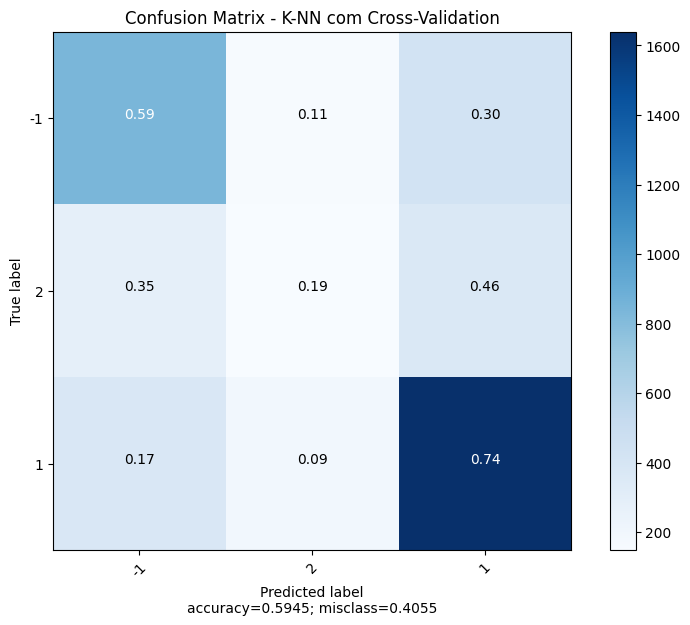

In [24]:
from sklearn.metrics import confusion_matrix
# Treinar o modelo com os dados completos
knn.fit(X, y)

# Prever os rótulos
y_pred = cross_val_predict(knn, X, y, cv=10)

# Calcular a matriz de confusão
cm = confusion_matrix(y, y_pred)

# Plotar a matriz de confusão
plot_confusion_matrix(cm, df['Target'].unique(), title="Confusion Matrix - K-NN com Cross-Validation")
